Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16 

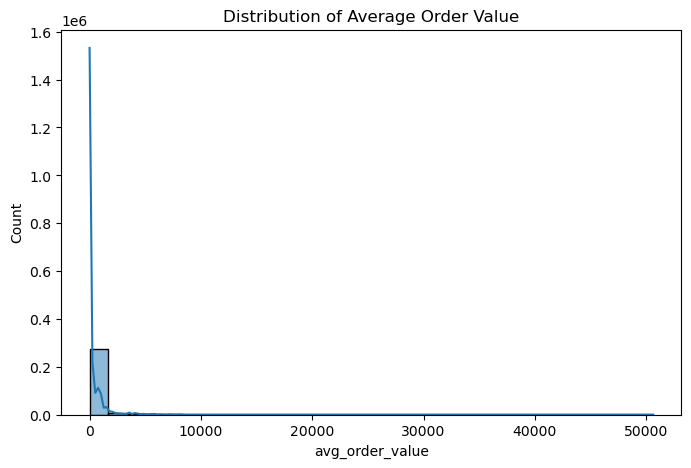

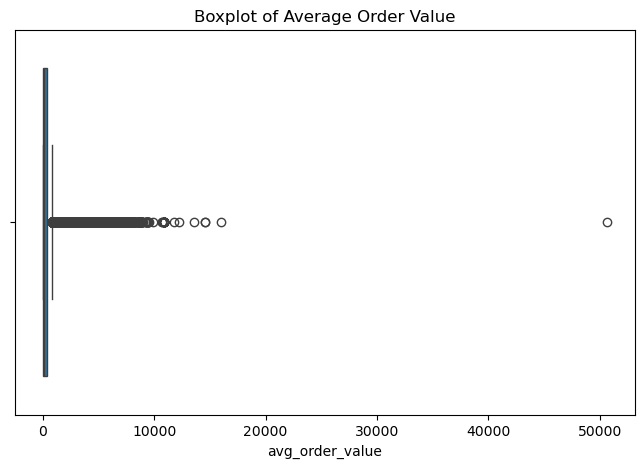

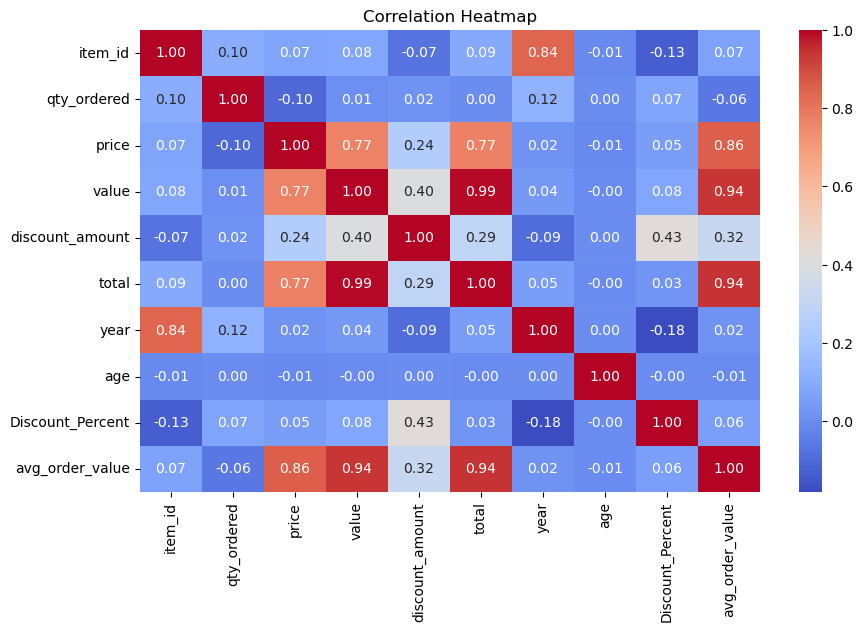

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/rk/Downloads/sales_06_FY2020-21 copy.csv"  # Change this to your actual dataset file
df = pd.read_csv(file_path, low_memory=False)  # Fixes mixed dtype warning

#  Display basic info
print("Dataset Information:")
print(df.info())

#  Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

#  Handling Missing Values
# Fill numerical missing values with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

#  Convert Data Types
# Convert date columns to datetime format
date_columns = ['order_date', 'signup_date', 'Customer Since']  # Update with actual date columns
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

#  Feature Engineering
# Create a new feature: Average Order Value (AOV)
if 'value' in df.columns and 'qty_ordered' in df.columns:
    df['avg_order_value'] = np.where(df['qty_ordered'] == 0, 0, df['value'] / df['qty_ordered'])
    print("\nSuccessfully created avg_order_value feature.")
else:
    print("\nWarning: 'value' or 'qty_ordered' column is missing. Skipping avg_order_value calculation.")

#  Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(df.describe())

# Visualizations (only if the column exists)
if 'avg_order_value' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['avg_order_value'], bins=30, kde=True)
    plt.title("Distribution of Average Order Value")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['avg_order_value'])
    plt.title("Boxplot of Average Order Value")
    plt.show()
else:
    print("\nSkipping visualizations: 'avg_order_value' not found in DataFrame.")

# Fix: Correlation Heatmap - Select only numeric columns
numeric_df = df.select_dtypes(include=['number']).copy()  # Exclude non-numeric columns

# Drop non-essential numeric columns (if necessary)
drop_cols = ['Zip', 'ref_num', 'cust_id']  # Add/remove columns as needed
numeric_df = numeric_df.drop(columns=[col for col in drop_cols if col in numeric_df.columns], errors='ignore')

# Check correlation and plot
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<Figure size 1000x600 with 0 Axes>

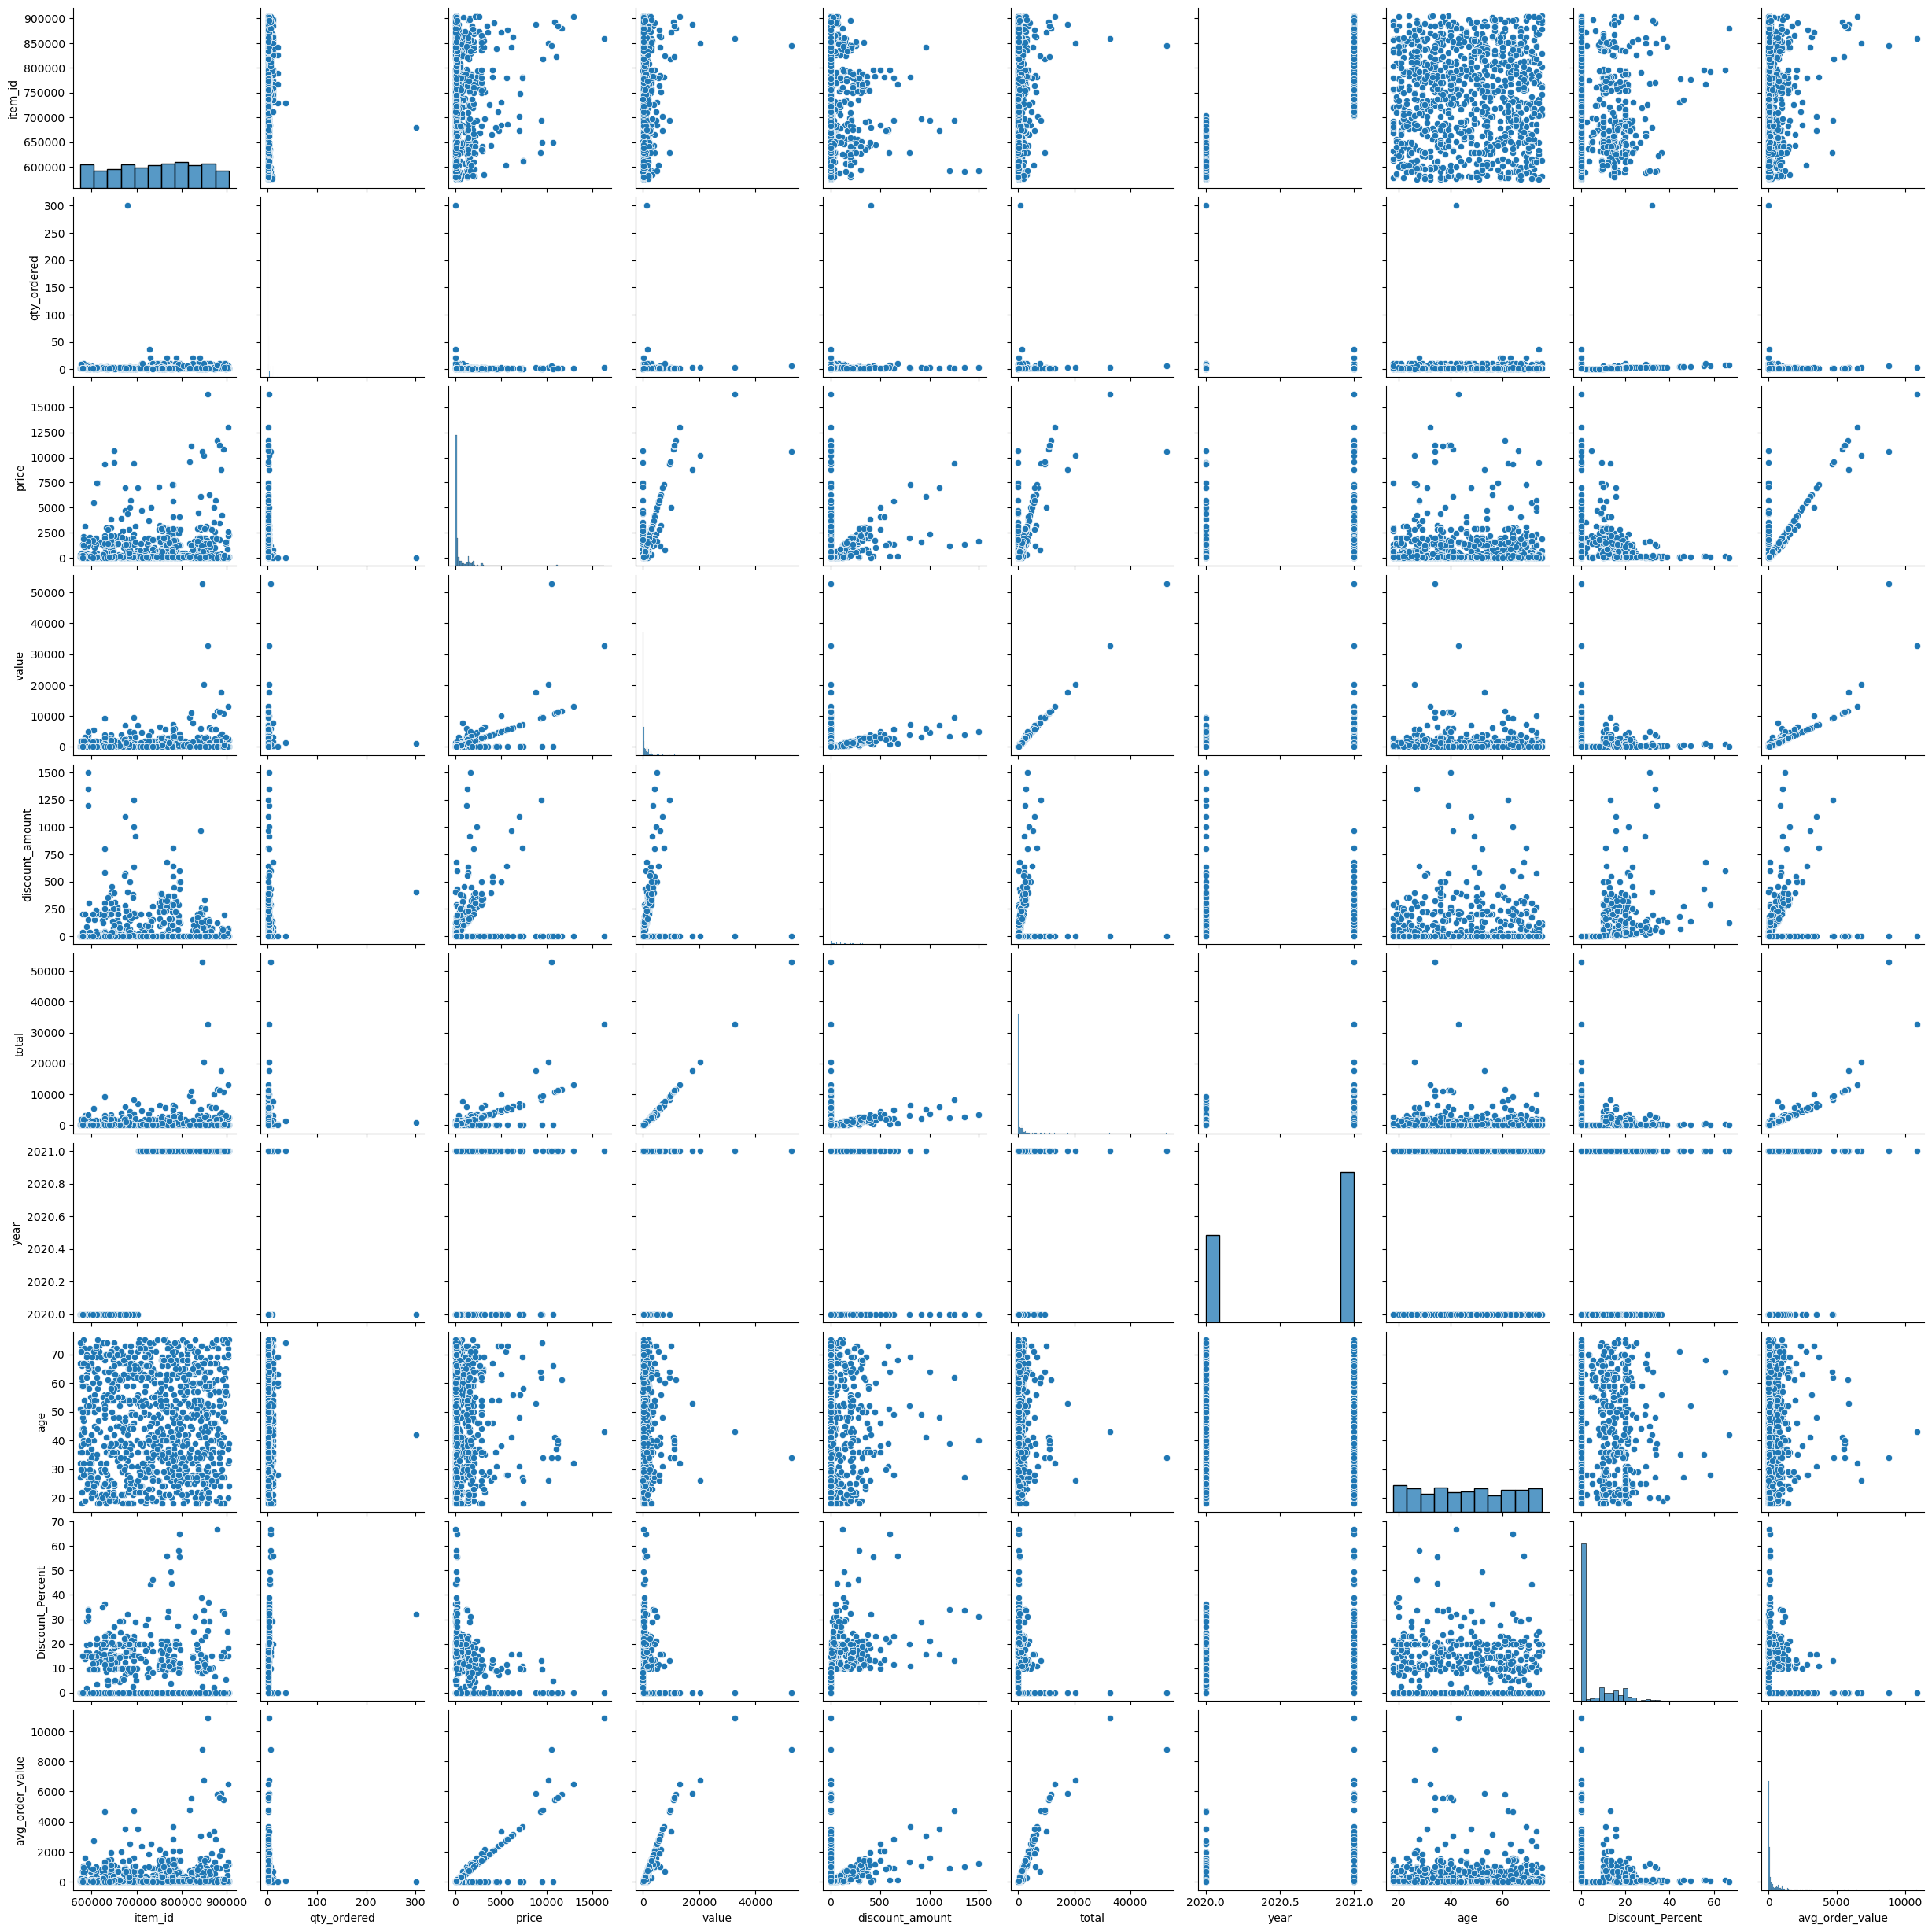

In [30]:
plt.figure(figsize=(10, 6))
sns.pairplot(numeric_df.sample(1000))  # Use a sample to avoid performance issues
plt.show()


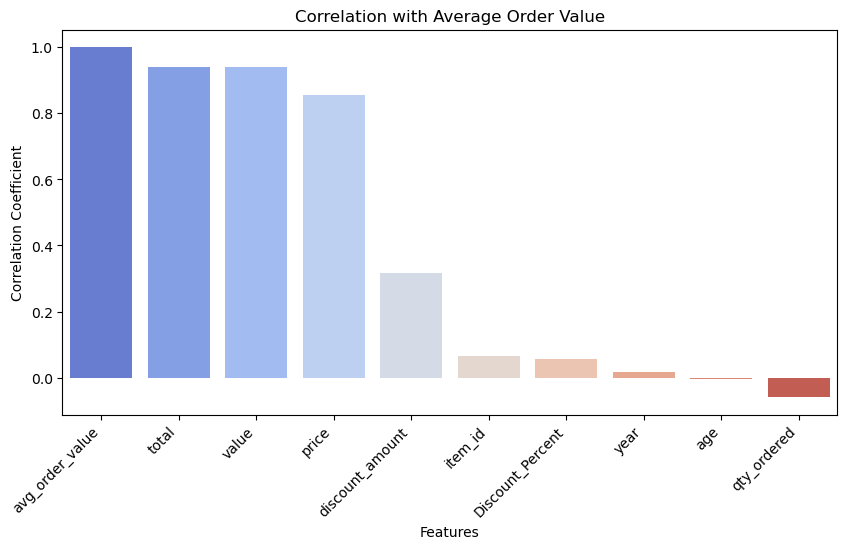

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation with avg_order_value
correlations = numeric_df.corr()['avg_order_value'].dropna().sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values, hue=correlations.index, dodge=False, legend=False, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation with Average Order Value")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()



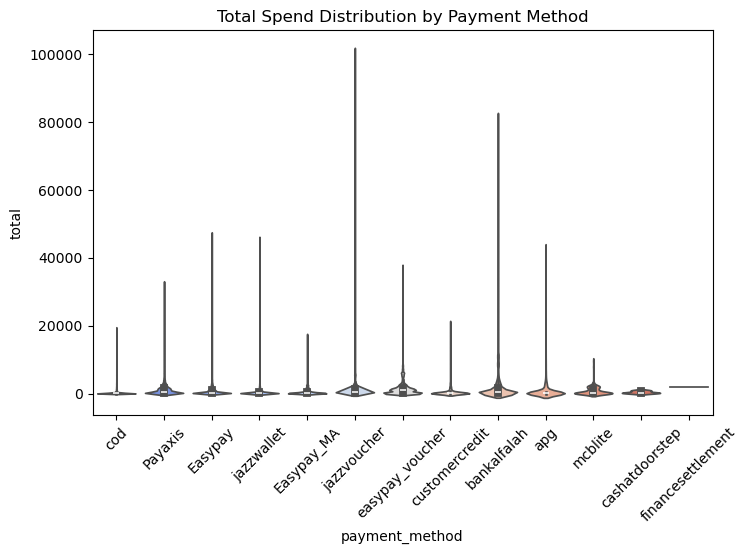

In [40]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='payment_method', y='total', data=df, hue='payment_method', legend=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Spend Distribution by Payment Method")
plt.show()



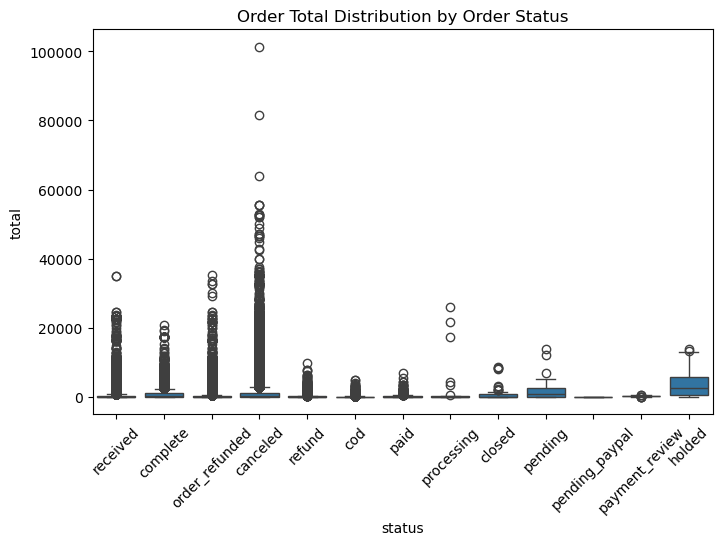

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['status'], y=df['total'])
plt.xticks(rotation=45)
plt.title("Order Total Distribution by Order Status")
plt.show()



Logistic Regression Accuracy: 0.5975313814836153

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64     30038
           1       0.59      0.50      0.54     27241

    accuracy                           0.60     57279
   macro avg       0.60      0.59      0.59     57279
weighted avg       0.60      0.60      0.59     57279


ROC AUC Score: 0.6566519712427985


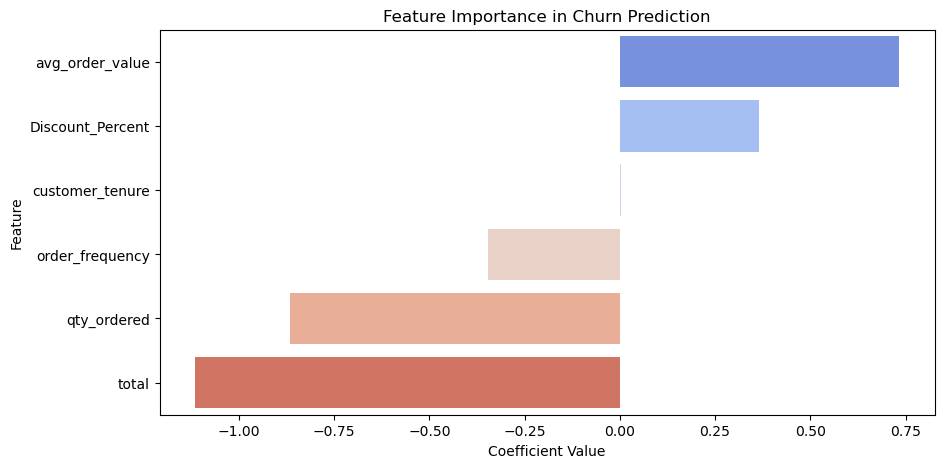

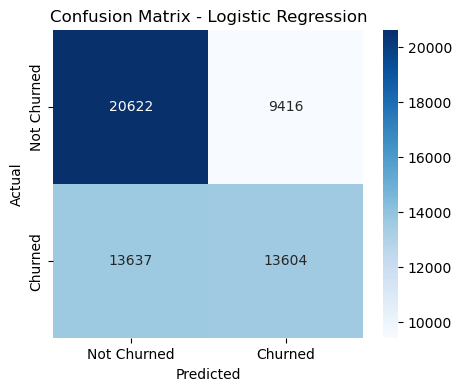

In [60]:
# ✅ Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# ✅ Ensure Features and Target are Properly Defined
feature_columns = ['total', 'Discount_Percent', 'qty_ordered', 'customer_tenure', 'order_frequency', 'avg_order_value']
X = df[feature_columns].copy()  # Copy to avoid modification warnings
y = df['churn']

# ✅ Standardize Numerical Features Properly
scaler = StandardScaler()
X[feature_columns] = scaler.fit_transform(X[feature_columns])

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# ✅ Model Evaluation
y_pred_log = log_reg.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# ✅ Feature Importance Fix
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# ✅ Visualization Fix: Seaborn Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, hue='Feature', legend=False, palette="coolwarm")
plt.title("Feature Importance in Churn Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# ✅ Confusion Matrix Fix
conf_matrix = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [66]:
# Ensure X_test includes relevant customer info
df_test = X_test.copy()

# Add churn probability predictions
df_test['churn_probability'] = log_reg.predict_proba(X_test)[:, 1]

# Add actual churn labels
df_test['actual_churn'] = y_test.values  # Ensure it's correctly mapped

# Sort customers by highest churn probability
high_risk_customers = df_test.sort_values(by='churn_probability', ascending=False).head(20)

# ✅ Display high-risk churn customers
print("\nTop 20 High-Risk Churn Customers:")
display(high_risk_customers)  # Works in Jupyter Notebook



Top 20 High-Risk Churn Customers:


,total,Discount_Percent,qty_ordered,customer_tenure,order_frequency,avg_order_value,churn_probability,actual_churn
264571,-0.390018,6.284739,0.872071,2.634927,-0.130947,-0.417270,0.822326,0
263527,-0.407492,6.224622,0.872071,0.547528,-0.151580,-0.423413,0.821642,0
151406,-0.371370,6.274738,0.872071,-1.112109,-0.184593,-0.410714,0.820878,1
265765,-0.347095,6.293623,0.872071,-0.809059,-0.205226,-0.402179,0.819980,0
213587,-0.338823,6.327261,0.872071,1.800983,-0.168087,-0.399271,0.819750,0
124992,-0.393118,6.309841,0.872071,1.493172,-0.052542,-0.418360,0.819684,0
124984,-0.393118,6.309841,0.872071,1.493172,-0.052542,-0.418360,0.819684,0
101222,-0.382805,6.180891,0.872071,-1.094021,-0.180466,-0.414734,0.817057,1
24597,-0.369555,6.180551,0.872071,-0.223902,-0.188719,-0.410075,0.816069,1
273400,-0.382861,6.134082,0.872071,-0.893786,-0.201099,-0.414754,0.815647,0


In [70]:
# Display top features affecting churn
print("\nTop Features Influencing Churn:")
display(feature_importance)  # Works in Jupyter Notebook

# If running in a standard Python script, use print()
print(feature_importance.to_string())  # Ensures full DataFrame is printed



Top Features Influencing Churn:


,Feature,Coefficient
5,avg_order_value,0.733428
1,Discount_Percent,0.364401
3,customer_tenure,0.002345
4,order_frequency,-0.345749
2,qty_ordered,-0.864648
0,total,-1.115631


            Feature  Coefficient
5   avg_order_value     0.733428
1  Discount_Percent     0.364401
3   customer_tenure     0.002345
4   order_frequency    -0.345749
2       qty_ordered    -0.864648
0             total    -1.115631
